In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from statsmodels.stats.weightstats import DescrStatsW

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

In [3]:
df = pd.read_csv('/content/Mental Health Social Media Dataset.csv')
df.columns = ['timestamp', 'age', 'gender', 'relationship status', 'occupation status', 'education', 'use social media', 'sm platform',
                'avg time', 'no purpose', 'distraction', 'restless', 'easily distract', 'worried', 'concentrate diff', 'comparing',
                'comparisons feels', 'media validation', 'depression', 'activities', 'sleeping problems']

In [4]:
df = df[df['use social media'] == 'Yes']
df = df[df['age'] < 91]
selec_df = df[['timestamp', 'age', 'gender', 'relationship status', 'occupation status',
                'avg time', 'depression', 'activities', 'sleeping problems']]

In [5]:
age_range = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
age_range_col = []
gender_col = []
using_time = []
exposure_time = []
relationship = []
occupation = []

for val in selec_df.age:
  if 13 <= val <= 19:
    age_range_col.append('10-19')
  elif 20 <= val <= 29:
    age_range_col.append('20-29')
  elif 30 <= val <= 39:
    age_range_col.append('30-39')
  elif 40 <= val <= 49:
    age_range_col.append('40-49')
  elif 50 <= val <= 59:
    age_range_col.append('50-59')
  elif 60 <= val <= 69:
    age_range_col.append('60-69')

for val in selec_df.gender:
  if val == 'Male' or val == 'Female':
    gender_col.append(0)
  elif val == 'Female':
    gender_col.append(1)
  else:
    gender_col.append(2)

for val in selec_df['avg time']:
  if val == 'Less than an Hour':
    using_time.append(0)
  elif val == 'Between 1 and 2 hours':
    using_time.append(1)
  elif val == 'Between 2 and 3 hours':
    using_time.append(2)
  elif val == 'Between 3 and 4 hours':
    using_time.append(3)
  elif val == 'Between 4 and 5 hours':
    using_time.append(4)
  elif val == 'More than 5 hours':
    using_time.append(5)

for val in selec_df['avg time']:
  if val == 'Less than an Hour' or val == 'Between 1 and 2 hours' or val == 'Between 2 and 3 hours':
    exposure_time.append(0)
  elif val == 'Between 3 and 4 hours' or val == 'Between 4 and 5 hours' or val == 'More than 5 hours':
    exposure_time.append(1)

for val in selec_df['relationship status']:
  if val == 'Single':
    relationship.append(0)
  elif val == 'In a relationship':
    relationship.append(1)
  elif val == 'Married':
    relationship.append(2)
  elif val == 'Divorced':
    relationship.append(4)

for val in selec_df['occupation status']:
  if val == 'School Student':
    occupation.append(0)
  elif val == 'University Student':
    occupation.append(1)
  elif val == 'Salaried Worker':
    occupation.append(2)
  elif val == 'Retired':
    occupation.append(4)

selec_df['age_range'] = age_range_col
selec_df['fix_gender'] = gender_col
selec_df['using_time'] = using_time
selec_df['exposure'] = exposure_time
selec_df['relationship'] = relationship
selec_df['occupation'] = occupation
selec_df['qol'] = (selec_df['depression'] + selec_df['sleeping problems'] + selec_df['activities'])
selec_df

<ipython-input-5-0d73dd6ffdad>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selec_df['age_range'] = age_range_col
<ipython-input-5-0d73dd6ffdad>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selec_df['fix_gender'] = gender_col
<ipython-input-5-0d73dd6ffdad>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,timestamp,age,gender,relationship status,occupation status,avg time,depression,activities,sleeping problems,age_range,fix_gender,using_time,exposure,relationship,occupation,qol
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,Between 2 and 3 hours,5,4,5,20-29,0,2,0,1,1,14
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,More than 5 hours,5,4,5,20-29,0,5,1,0,1,14
2,4/18/2022 19:25:58,21.0,Female,Single,University Student,Between 3 and 4 hours,4,2,5,20-29,0,3,1,0,1,11
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,More than 5 hours,4,3,2,20-29,0,5,1,0,1,9
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,Between 2 and 3 hours,4,4,1,20-29,0,2,0,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:27,24.0,Male,Single,Salaried Worker,Between 2 and 3 hours,3,4,4,20-29,0,2,0,0,2,11
477,5/22/2022 0:01:04,26.0,Female,Married,Salaried Worker,Between 1 and 2 hours,4,4,1,20-29,0,1,0,2,2,9
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,Between 2 and 3 hours,2,2,2,20-29,0,2,0,2,2,6
479,7/14/2022 19:33:46,21.0,Male,Single,University Student,Between 2 and 3 hours,4,5,4,20-29,0,2,0,0,1,13


#Calculation for data tables

In [16]:
# Pivot the DataFrame to get age as rows and gender as columns
table = selec_df.pivot_table(index='range_age', columns='fix_gender', aggfunc='size', fill_value=0)
table.loc['Total'] = table.sum()  # Add a summary row for each gender
table['Total'] = table.sum(axis=1)
# Display the resulting table
#table.to_csv("table_summary.csv")
print(table)

In [17]:
# Pivot the DataFrame to get age as rows and gender as columns
table = selec_df.pivot_table(index='avg time', columns='depression', aggfunc='size', fill_value=0)
table.loc['Total'] = table.sum()  # Add a summary row for each gender
table['Total'] = table.sum(axis=1)
# Display the resulting table
table.to_csv("table_summary.csv")
print(table)

depression              1   2    3    4    5  Total
avg time                                           
Between 1 and 2 hours  12  17   20    8   11     68
Between 2 and 3 hours  13  21   21   27   18    100
Between 3 and 4 hours  10  10   30   22   21     93
Between 4 and 5 hours   5  10   15   24   13     67
Less than an Hour      13  12    4    2    2     33
More than 5 hours       5  12   27   33   39    116
Total                  58  82  117  116  104    477


In [15]:
more3 = selec_df[selec_df['using_time'] >= 3]
less3 = selec_df[selec_df['using_time'] < 3]

mask_all = less3
mask_depression = mask_all[mask_all['depression'] > 3]
mask_activity = mask_all[mask_all['activities'] > 3]
mask_sleep_prob = mask_all[mask_all['sleeping problems'] > 3]

In [16]:
# Pivot the DataFrame to get age as rows and gender as columns
table = mask_depression.pivot_table(index='range_age', columns='depression', aggfunc='size', fill_value=0)
table.loc['Total'] = table.sum()  # Add a summary row for each gender
table['Total'] = table.sum(axis=1)
# Display the resulting table
#table.to_csv("table_summary.csv")
print(table)

depression   4   5  Total
range_age                
10-19        5   1      6
20-29       25  30     55
30-39        5   0      5
40-49        2   0      2
Total       37  31     68


In [17]:
# Pivot the DataFrame to get age as rows and gender as columns
table = mask_activity.pivot_table(index='range_age', columns='activities', aggfunc='size', fill_value=0)
table.loc['Total'] = table.sum()  # Add a summary row for each gender
table['Total'] = table.sum(axis=1)
# Display the resulting table
table.to_csv("table_summary.csv")
print(table)

activities   4   5  Total
range_age                
10-19        5   1      6
20-29       32  17     49
30-39        5   1      6
40-49        1   1      2
50-59        1   0      1
Total       44  20     64


In [18]:
# Pivot the DataFrame to get age as rows and gender as columns
table = mask_sleep_prob.pivot_table(index='range_age', columns='sleeping problems', aggfunc='size', fill_value=0)
table.loc['Total'] = table.sum()  # Add a summary row for each gender
table['Total'] = table.sum(axis=1)
# Display the resulting table
table.to_csv("table_summary.csv")
print(table)

sleeping problems   4   5  Total
range_age                       
10-19               5   2      7
20-29              30  29     59
30-39               5   5     10
40-49               8   1      9
50-59               3   0      3
Total              51  37     88


In [19]:
mask_depression_activity = mask_depression[mask_depression['activities'] > 3]
mask_depression_sleep_prob = mask_depression[mask_depression['sleeping problems'] > 3]
mask_sleep_prob_activity = mask_sleep_prob[mask_sleep_prob['activities'] > 3]

In [20]:
# Pivot the DataFrame to get age as rows and gender as columns
table = mask_depression_activity.pivot_table(index='range_age', columns='depression', aggfunc='size', fill_value=0)
table.loc['Total'] = table.sum()  # Add a summary row for each gender
table['Total'] = table.sum(axis=1)
# Display the resulting table
#table.to_csv("table_summary.csv")
print(table)

depression   4   5  Total
range_age                
10-19        3   0      3
20-29       14  19     33
30-39        4   0      4
Total       21  19     40


In [21]:
# Pivot the DataFrame to get age as rows and gender as columns
table = mask_depression_sleep_prob.pivot_table(index='range_age', columns='sleeping problems', aggfunc='size', fill_value=0)
table.loc['Total'] = table.sum()  # Add a summary row for each gender
table['Total'] = table.sum(axis=1)
# Display the resulting table
table.to_csv("table_summary.csv")
print(table)

sleeping problems   4   5  Total
range_age                       
10-19               3   1      4
20-29              14  19     33
30-39               2   3      5
40-49               0   1      1
Total              19  24     43


In [22]:
# Pivot the DataFrame to get age as rows and gender as columns
table = mask_sleep_prob_activity.pivot_table(index='range_age', columns='sleeping problems', aggfunc='size', fill_value=0)
table.loc['Total'] = table.sum()  # Add a summary row for each gender
table['Total'] = table.sum(axis=1)
# Display the resulting table
table.to_csv("table_summary.csv")
print(table)

sleeping problems   4   5  Total
range_age                       
10-19               2   1      3
20-29              15  17     32
30-39               2   3      5
40-49               1   0      1
Total              20  21     41


In [23]:
mask_depression_activity_sleep_prob = mask_depression_sleep_prob[mask_depression_sleep_prob['activities'] > 3]

In [24]:
# Pivot the DataFrame to get age as rows and gender as columns
table = mask_depression_activity_sleep_prob.pivot_table(index='range_age', columns='sleeping problems', aggfunc='size', fill_value=0)
table.loc['Total'] = table.sum()  # Add a summary row for each gender
table['Total'] = table.sum(axis=1)
# Display the resulting table
table.to_csv("table_summary.csv")
print(table)

sleeping problems   4   5  Total
range_age                       
10-19               1   1      2
20-29              10  12     22
30-39               1   3      4
Total              12  16     28


#Graphs for statistics

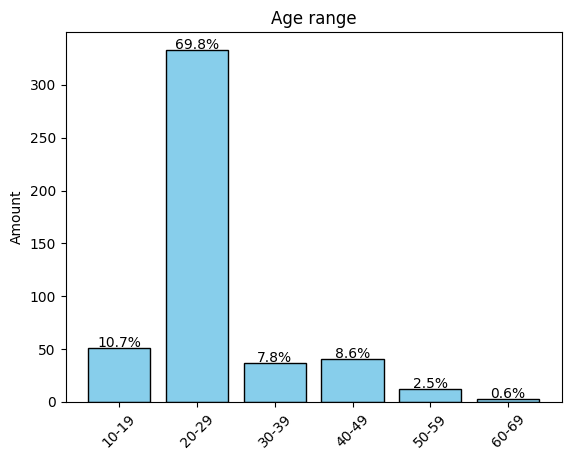

In [64]:
age_range = np.array(selec_df['age_range'])
categories = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']

age_range_cat = pd.Categorical(age_range, categories=categories, ordered=True)

counts, bins, patches = plt.hist(age_range_cat.codes, bins=np.arange(len(categories) + 1),
                                  color='skyblue', edgecolor='black', rwidth=0.8)

plt.xticks(np.arange(len(categories)) + 0.5, categories, rotation=45)
plt.ylabel('Amount')
plt.title('Age range')

total = counts.sum()
for i, count in enumerate(counts):
    percentage = (count / total) * 100
    bin_center = (bins[i] + bins[i + 1]) / 2
    plt.text(bin_center, count + 1, f'{percentage:.1f}%', ha='center')

plt.show()

<ipython-input-67-95c5ce45c10e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selec_df['gender_for_hist'] = gender_for_hist


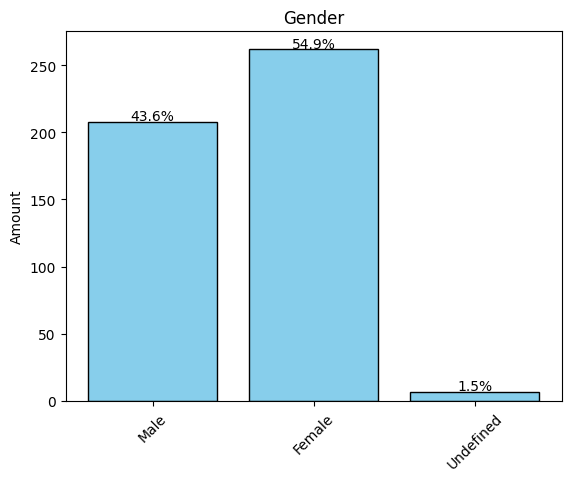

In [67]:
gender_for_hist = []
for val in selec_df.gender:
  if val == 'Male' or val == 'Female':
    gender_for_hist.append(val)
  else:
    gender_for_hist.append('Undefined')

selec_df['gender_for_hist'] = gender_for_hist
gender = np.array(selec_df['gender_for_hist'])
categories = ['Male', 'Female', 'Undefined']

gender_cat = pd.Categorical(gender, categories=categories, ordered=True)

counts, bins, patches = plt.hist(gender_cat.codes, bins=np.arange(len(categories) + 1),
                                  color='skyblue', edgecolor='black', rwidth=0.8)

plt.xticks(np.arange(len(categories)) + 0.5, categories, rotation=45)
plt.ylabel('Amount')
plt.title('Gender')

total = counts.sum()
for i, count in enumerate(counts):
    percentage = (count / total) * 100
    bin_center = (bins[i] + bins[i + 1]) / 2
    plt.text(bin_center, count + 1, f'{percentage:.1f}%', ha='center')

plt.show()

<ipython-input-19-e7d2bda78ea7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selec_df['avg time'] = pd.Categorical(selec_df['avg time'], categories=categories, ordered=True)
<ipython-input-19-e7d2bda78ea7>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_qol_per_time = selec_df.groupby('avg time')['qol'].mean().reset_index()


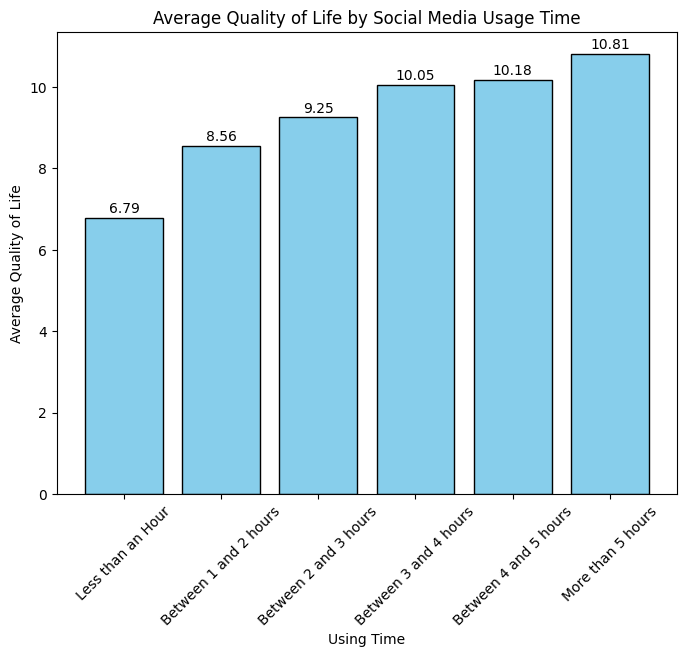

In [19]:
categories = ['Less than an Hour', 'Between 1 and 2 hours', 'Between 2 and 3 hours',
              'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours']
selec_df['avg time'] = pd.Categorical(selec_df['avg time'], categories=categories, ordered=True)
avg_qol_per_time = selec_df.groupby('avg time')['qol'].mean().reset_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(avg_qol_per_time['avg time'], avg_qol_per_time['qol'], color='skyblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom')

plt.xlabel('Using Time')
plt.ylabel('Average Quality of Life')
plt.title('Average Quality of Life by Social Media Usage Time')
plt.xticks(rotation=45)

plt.show()

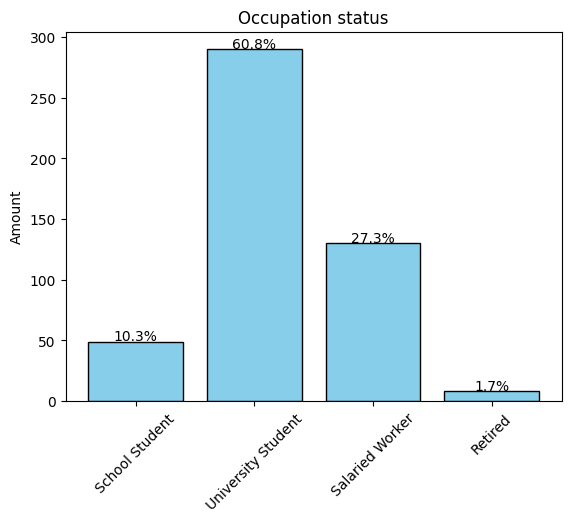

In [69]:
occupation = np.array(selec_df['occupation status'])
categories = ['School Student', 'University Student', 'Salaried Worker', 'Retired']

occupation_cat = pd.Categorical(occupation, categories=categories, ordered=True)
counts, bins, patches = plt.hist(occupation_cat.codes, bins=np.arange(len(categories) + 1),
                                  color='skyblue', edgecolor='black', rwidth=0.8)

plt.xticks(np.arange(len(categories)) + 0.5, categories, rotation=45)
plt.ylabel('Amount')
plt.title('Occupation status')

total = counts.sum()
for i, count in enumerate(counts):
    percentage = (count / total) * 100
    bin_center = (bins[i] + bins[i + 1]) / 2
    plt.text(bin_center, count + 1, f'{percentage:.1f}%', ha='center')

plt.show()

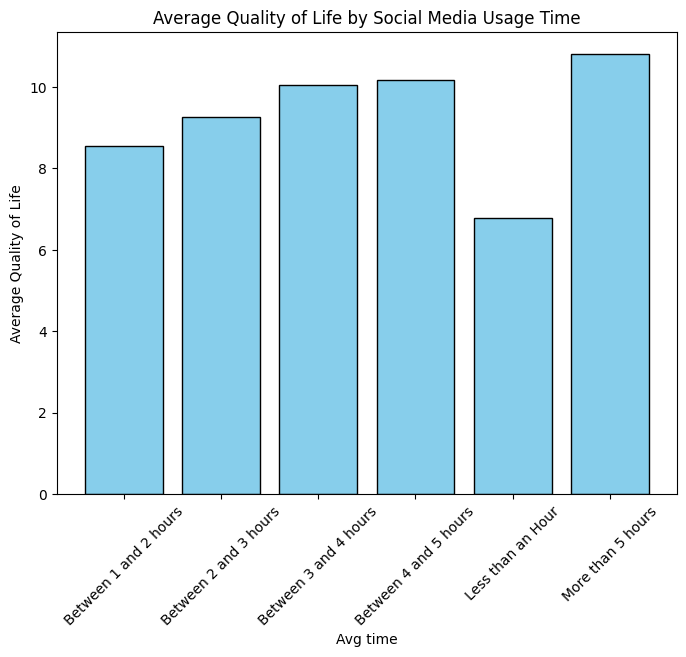

In [12]:
avg_qol_per_time = selec_df.groupby('avg time')['qol'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(avg_qol_per_time['avg time'], avg_qol_per_time['qol'], color='skyblue', edgecolor='black')

plt.xlabel('Avg time')
plt.ylabel('Average Quality of Life')
plt.title('Average Quality of Life by Social Media Usage Time')
plt.xticks(rotation=45)

plt.show()

In [70]:
selec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 480
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            477 non-null    object 
 1   age                  477 non-null    float64
 2   gender               477 non-null    object 
 3   relationship status  477 non-null    object 
 4   occupation status    477 non-null    object 
 5   avg time             477 non-null    object 
 6   depression           477 non-null    int64  
 7   activities           477 non-null    int64  
 8   sleeping problems    477 non-null    int64  
 9   age_range            477 non-null    object 
 10  fix_gender           477 non-null    int64  
 11  using_time           477 non-null    int64  
 12  exposure             477 non-null    int64  
 13  relationship         477 non-null    int64  
 14  occupation           477 non-null    int64  
 15  qol                  477 non-null    int64  


In [5]:
selec_df.columns

Index(['timestamp', 'age', 'gender', 'relationship status',
       'occupation status', 'avg time', 'depression', 'activities',
       'sleeping problems', 'age_range', 'fix_gender', 'using_time',
       'exposure', 'relationship', 'occupation', 'qol'],
      dtype='object')

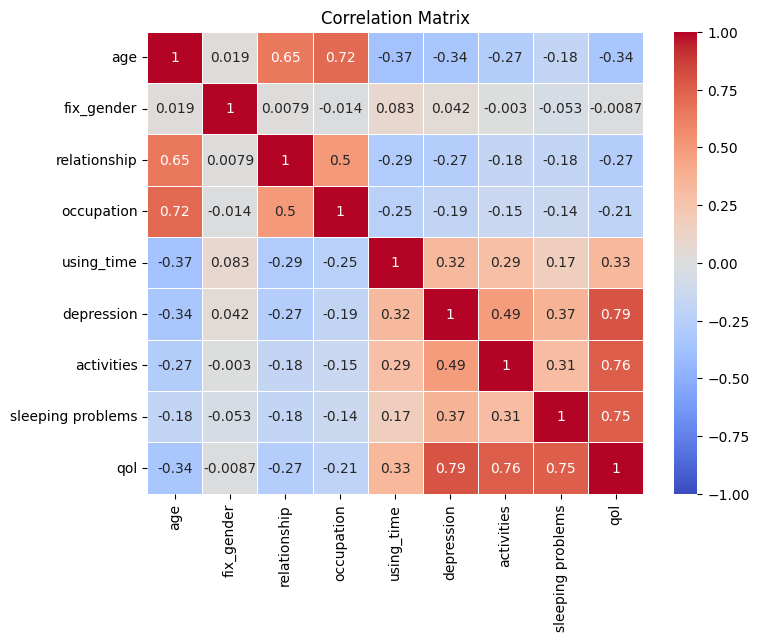

In [21]:
df_corr = selec_df.copy()
df_corr = df_corr[['age', 'fix_gender', 'relationship', 'occupation', 'using_time',
                   'depression', 'activities', 'sleeping problems', 'qol']]

correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

#Matching

In [37]:
def matching(data):
  def matching_ate(data):
      covariates = ['relationship', 'fix_gender', 'occupation']
      log_reg = LogisticRegression()
      log_reg.fit(data[covariates], data['exposure'])
      data['propensity_score'] = log_reg.predict_proba(data[covariates])[:, 1]

      treated = data[data['exposure'] == 1]
      control = data[data['exposure'] == 0]
      nn = NearestNeighbors(n_neighbors=1)
      nn.fit(control[['propensity_score']])
      distances, indices = nn.kneighbors(treated[['propensity_score']])
      matched_control = control.iloc[indices.flatten()]

      ATE = (treated['qol'].values - matched_control['qol'].values).mean()
      return ATE

  bootstrap_ates = []
  n_iterations = 1000
  np.random.seed(42)

  for i in range(n_iterations):
      sample = data.sample(frac=1, replace=True)
      bootstrap_ate = matching_ate(sample)
      bootstrap_ates.append(bootstrap_ate)

  lower_bound = np.percentile(bootstrap_ates, 2.5)
  upper_bound = np.percentile(bootstrap_ates, 97.5)

  return np.mean(bootstrap_ates), lower_bound, upper_bound

#Linear regression

In [38]:
import statsmodels.api as sm

def regression(data):
  def regression_ate(data):
      data['intercept'] = 1
      model = sm.OLS(data['qol'], data[['intercept', 'exposure', 'relationship', 'fix_gender', 'occupation']])
      results = model.fit()
      return results.params['exposure']

  bootstrap_ates_reg = []
  n_iterations = 1000

  for i in range(n_iterations):
      sample = data.sample(frac=1, replace=True)
      bootstrap_ate_reg = regression_ate(sample)
      bootstrap_ates_reg.append(bootstrap_ate_reg)

  lower_bound_reg = np.percentile(bootstrap_ates_reg, 2.5)
  upper_bound_reg = np.percentile(bootstrap_ates_reg, 97.5)

  return np.mean(bootstrap_ates_reg), lower_bound_reg, upper_bound_reg

#Run

In [39]:
age_range.pop()
age_range.pop()
print(age_range)
for age in age_range:
  data = selec_df.copy()
  data = data[data.age_range == age]
  mean_bootstrap_ates, lower_bound, upper_bound = matching(data)

  print(age)
  print(f"ATE (Matching): {mean_bootstrap_ates}")
  print(f"95% Confidence Interval (Bootstrap): ({lower_bound}, {upper_bound})")
  print("")

  bootstrap_ates_reg, lower_bound_reg, upper_bound_reg = regression(data)

  print(f"ATE (Regression): {bootstrap_ates_reg}")
  print(f"95% Confidence Interval (Bootstrap): ({lower_bound_reg}, {upper_bound_reg})")
  print("")

['10-19', '20-29', '30-39', '40-49']
10-19
ATE (Matching): 1.8923064868242174
95% Confidence Interval (Bootstrap): (-1.6863345864661654, 5.515203761755486)

ATE (Regression): 1.655170045999646
95% Confidence Interval (Bootstrap): (-0.23764767761505023, 3.4104966085271338)

20-29
ATE (Matching): 0.8287294592924812
95% Confidence Interval (Bootstrap): (-2.639921574903969, 4.442056650246303)

ATE (Regression): 0.7660238122162403
95% Confidence Interval (Bootstrap): (0.14619699865295852, 1.4096195571028032)

30-39
ATE (Matching): 1.022096066508087
95% Confidence Interval (Bootstrap): (-4.5011363636363635, 6.0)

ATE (Regression): 1.4843469925292754
95% Confidence Interval (Bootstrap): (-1.0408971129835847, 3.9932973611787936)

40-49
ATE (Matching): 2.123673928848929
95% Confidence Interval (Bootstrap): (-1.8571428571428572, 6.715873015873014)

ATE (Regression): 1.0020634262886867
95% Confidence Interval (Bootstrap): (-1.417294176706829, 3.484982174688059)



In [40]:
old_age_range = ['50-59', '60-69']
print(old_age_range)
for age in old_age_range:
  data = selec_df.copy()
  data = data[data.age_range == age]

  bootstrap_ates_reg, lower_bound_reg, upper_bound_reg = regression(data)

  print(f"ATE (Regression): {bootstrap_ates_reg}")
  print(f"95% Confidence Interval (Bootstrap): ({lower_bound_reg}, {upper_bound_reg})")
  print("")

['50-59', '60-69']
ATE (Regression): 2.327922445006964
95% Confidence Interval (Bootstrap): (-1.076664369947056e-15, 4.94817400644468)

ATE (Regression): 0.26106605054498355
95% Confidence Interval (Bootstrap): (-0.6728971962616845, 0.631578947368421)

